In [ ]:
Name: Poornima Sharma
Student ID: ULK832

In [ ]:
################## Part 1: Part 1. Topic and Dataset #######################
 

In [185]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
# OS related
import os
# For data processing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report


# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import csv

data = pd.read_csv("AirbnbDataForAnalysis_poornima.csv")
data.shape

(5000, 25)

In [3]:
data.describe()

id       host id          lat         long  \
count  5.000000e+03  5.000000e+03  5000.000000  5000.000000   
mean   2.412841e+06  4.863152e+10    40.729109   -73.960919   
std    8.000469e+05  2.845899e+10     0.051449     0.035568   
min    1.001254e+06  1.316021e+08    40.508680   -74.239860   
25%    1.723606e+06  2.391220e+10    40.688848   -73.984550   
50%    2.413843e+06  4.797174e+10    40.723020   -73.960635   
75%    3.105185e+06  7.332117e+10    40.763040   -73.944990   
max    3.795974e+06  9.872629e+10    40.908040   -73.733230   

       Construction year  minimum nights  number of reviews  \
count        4997.000000     5000.000000        4996.000000   
mean         2012.374625       10.441200          61.244796   
std             5.785648       57.360608          77.159081   
min          2003.000000      -12.000000           0.000000   
25%          2007.000000        2.000000           8.000000   
50%          2012.000000        3.000000          28.000000   
75%          2017.000000        6.000000          86.000000   
max          2022.000000     3455.000000         607.000000   

       reviews per month  review rate number  calculated host listings count  \
count        4991.000000         4997.000000                      5000.00000   
mean            0.894851            3.002802                         2.45840   
std             1.086508            1.415484                         6.12844   
min             0.010000            1.000000                         1.00000   
25%             0.150000            2.000000                         1.00000   
50%             0.450000            3.000000                         1.00000   
75%             1.260000            4.000000                         2.00000   
max            10.000000            5.000000                        52.00000   

       availability 365  Unnamed: 24  
count       5000.000000          0.0  
mean         210.958400          NaN  
std          126.604316          NaN  
min          -10.000000          NaN  
25%          100.000000          NaN  
50%          213.000000          NaN  
75%          323.000000          NaN  
max          426.000000          NaN

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5000 non-null   int64  
 1   NAME                            5000 non-null   object 
 2   host id                         5000 non-null   int64  
 3   host_identity_verified          5000 non-null   object 
 4   host name                       4999 non-null   object 
 5   neighbourhood group             4998 non-null   object 
 6   neighbourhood                   4997 non-null   object 
 7   lat                             5000 non-null   float64
 8   long                            5000 non-null   float64
 9   country                         5000 non-null   object 
 10  country code                    5000 non-null   object 
 11  instant_bookable                5000 non-null   bool   
 12  cancellation_policy             50

In [5]:
data.isna().sum()

id                                   0
NAME                                 0
host id                              0
host_identity_verified               0
host name                            1
neighbourhood group                  2
neighbourhood                        3
lat                                  0
long                                 0
country                              0
country code                         0
instant_bookable                     0
cancellation_policy                  0
room type                            0
Construction year                    3
price                                0
service fee                          0
minimum nights                       0
number of reviews                    4
last review                          9
reviews per month                    9
review rate number                   3
calculated host listings count       0
availability 365                     0
Unnamed: 24                       5000
dtype: int64

In [6]:
#Country has only one value so  i am going to  remove that 
data.country.unique()

array(['United States'], dtype=object)

In [7]:
data.drop("country", axis = 1, inplace = True)
data.shape

(5000, 24)

In [8]:
#Lat and Long is not going to add any value as Location is mentioned 
data.drop(["lat", "long"], axis = 1, inplace = True)

In [9]:
data.shape

(5000, 22)

In [10]:
print(data["id"].value_counts().count() , data["host id"].value_counts().count())

5000 5000


In [11]:
#Just like country, country code is useless, as data is of usa only
data["country code"].unique()
data.drop("country code", axis = 1, inplace = True)

In [12]:
data[["number of reviews","last review","reviews per month","review rate number"]]

number of reviews last review  reviews per month  review rate number
0                   9.0    10/19/21               0.21                 4.0
1                  45.0     5/21/22               0.38                 4.0
2                   9.0     5/21/22               0.38                 5.0
3                   9.0    11/19/18               0.10                 3.0
4                  74.0     6/22/19               0.59                 3.0
...                 ...         ...                ...                 ...
4995               30.0     3/14/19               0.50                 1.0
4996               41.0     1/25/16               0.69                 3.0
4997                3.0    12/31/16               0.06                 5.0
4998                3.0     8/27/14               0.05                 3.0
4999               57.0      6/8/19               0.97                 1.0

[5000 rows x 4 columns]

In [13]:
#So many review column doesn't add value. Especialy last data of review and reviews per month as this doesn't imply to any conclusion or result.
data.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
4  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2               verified     Elise           Manhattan        Harlem   
3               verified    Lyndon           Manhattan   East Harlem   
4               verified  Michelle           Manhattan   Murray Hill   

   instant_bookable cancellation_policy        room type  ...  price  \
0             False              strict     Private room  ...  $966    
1             False            moderate  Entire home/apt  ...  $142    
2              True            flexible     Private room  ...  $620    
3             False            moderate  Entire home/apt  ...  $204    
4              True            flexible  Entire home/apt  ...  $577    

  service fee minimum nights  number of reviews  last review  \
0       $193              10                9.0     10/19/21   
1        $28              30               45.0      5/21/22   
2       $124               3                9.0      5/21/22   
3        $41              10                9.0     11/19/18   
4       $115               3               74.0      6/22/19   

  reviews per month  review rate number  calculated host listings count  \
0              0.21                 4.0                               6   
1              0.38                 4.0                               2   
2              0.38                 5.0                               1   
3              0.10                 3.0                               1   
4              0.59                 3.0                               1   

   availability 365  Unnamed: 24  
0               286          NaN  
1               228          NaN  
2               352          NaN  
3               289          NaN  
4               374          NaN  

[5 rows x 21 columns]

In [14]:
#Changing data types to proper one. Also converting string to number where ever necessary

data['price'] = data['price'].str.replace('$', '').str.replace(",","").str.replace(" ",'').astype(float)
data['service fee'] = data['service fee'].str.replace('$', '').astype("float")
print(data.dtypes)

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
instant_bookable                     bool
cancellation_policy                object
room type                          object
Construction year                 float64
price                             float64
service fee                       float64
minimum nights                      int64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count      int64
availability 365                    int64
Unnamed: 24                       float64
dtype: object


/var/folders/vg/y6j496v145591np0gdrmp27m0000gn/T/ipykernel_92221/3108871525.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '').str.replace(",","").str.replace(" ",'').astype(float)
/var/folders/vg/y6j496v145591np0gdrmp27m0000gn/T/ipykernel_92221/3108871525.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['service fee'] = data['service fee'].str.replace('$', '').astype("float")


In [15]:
#neighborhood group is not necessary. And renaming the column name to suggest proper meaning.

data["Area"] = data["neighbourhood group"]
data.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
4  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2               verified     Elise           Manhattan        Harlem   
3               verified    Lyndon           Manhattan   East Harlem   
4               verified  Michelle           Manhattan   Murray Hill   

   instant_bookable cancellation_policy        room type  ...  service fee  \
0             False              strict     Private room  ...        193.0   
1             False            moderate  Entire home/apt  ...         28.0   
2              True            flexible     Private room  ...        124.0   
3             False            moderate  Entire home/apt  ...         41.0   
4              True            flexible  Entire home/apt  ...        115.0   

   minimum nights  number of reviews  last review  reviews per month  \
0              10                9.0     10/19/21               0.21   
1              30               45.0      5/21/22               0.38   
2               3                9.0      5/21/22               0.38   
3              10                9.0     11/19/18               0.10   
4               3               74.0      6/22/19               0.59   

  review rate number  calculated host listings count  availability 365  \
0                4.0                               6               286   
1                4.0                               2               228   
2                5.0                               1               352   
3                3.0                               1               289   
4                3.0                               1               374   

   Unnamed: 24       Area  
0          NaN   Brooklyn  
1          NaN  Manhattan  
2          NaN  Manhattan  
3          NaN  Manhattan  
4          NaN  Manhattan  

[5 rows x 22 columns]

In [16]:
data.Area.unique()


array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens',
       'Staten Island', 'Bronx', nan], dtype=object)

In [17]:
#Correcting the entry name or correcting the duplicates

data.Area = data.Area.str.replace('Manhattan', 'manhatan')
data.Area = data.Area.str.replace('Brooklyn', 'brookln')
data.Area = data.Area.fillna('Unknown')

data.Area.unique()

array(['brookln', 'manhatan', 'Queens', 'Staten Island', 'Bronx',
       'Unknown'], dtype=object)

In [18]:
#Removing nan values from price column

print(data.shape)
data.dropna(subset=['price'], inplace=True)
print(data.shape)
data.price.isna().sum()



(5000, 22)
(5000, 22)


0

In [19]:
#dropping unnamed column which has no values and meaning

data.drop("Unnamed: 24", axis = 1, inplace = True)
data.shape

(5000, 21)

<AxesSubplot:>

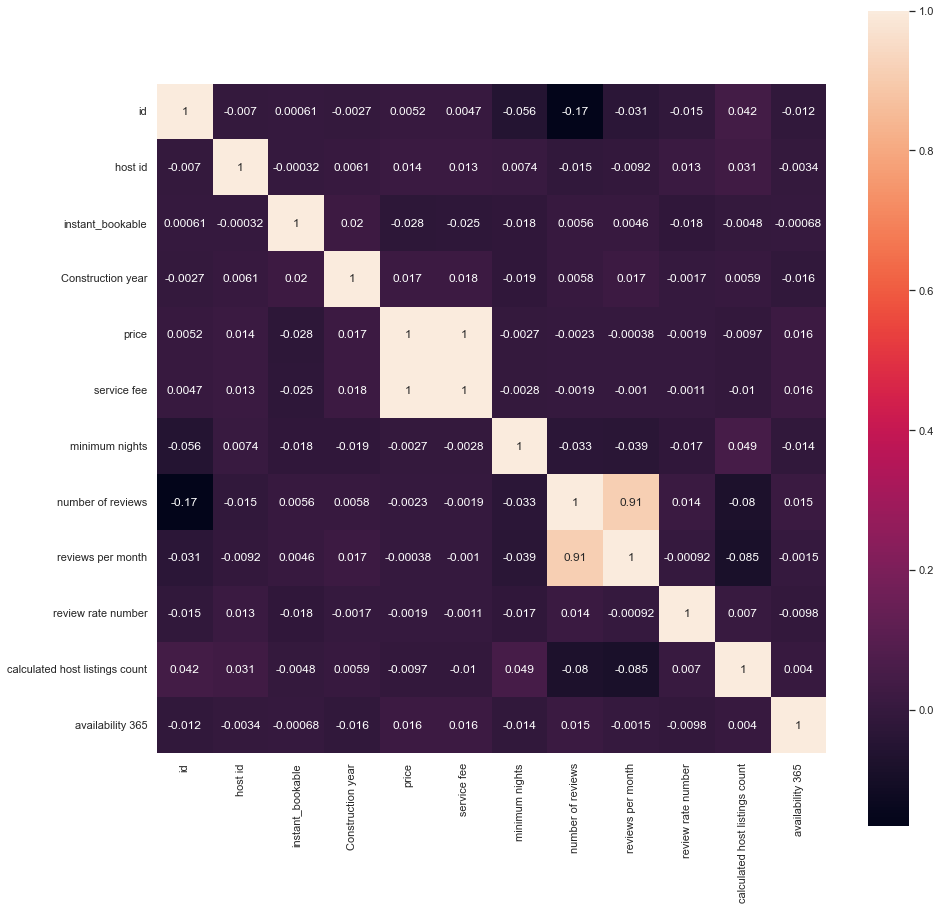

In [20]:
# heatmap of correlation
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(data.corr(), annot=True, square=True)

<AxesSubplot:>

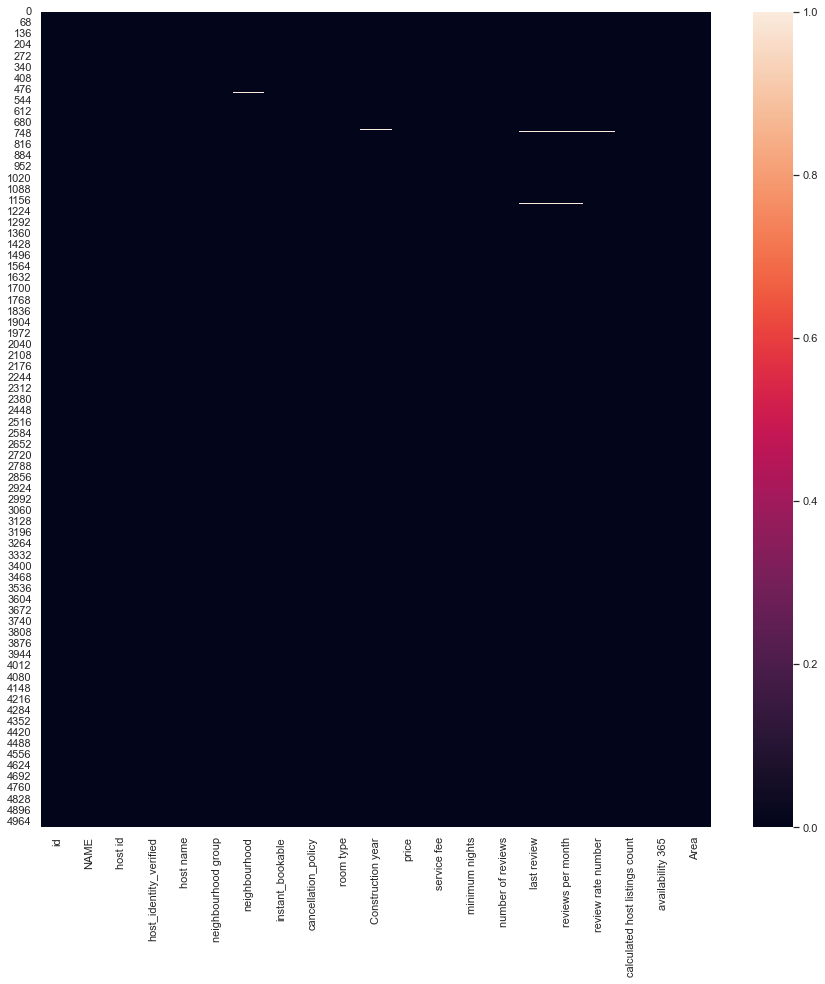

In [21]:
sns.heatmap(data.isnull())

In [22]:
data.isnull().sum()


id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         1
neighbourhood group               2
neighbourhood                     3
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 3
price                             0
service fee                       0
minimum nights                    0
number of reviews                 4
last review                       9
reviews per month                 9
review rate number                3
calculated host listings count    0
availability 365                  0
Area                              0
dtype: int64

In [23]:
#Removing null value rows

data = data.dropna(subset=['last review','reviews per month'])
data = data.dropna(subset=['host name','neighbourhood','neighbourhood group'])
data = data.dropna(subset=['Construction year','number of reviews','review rate number'])


In [24]:
data.shape

(4977, 21)

In [25]:
data.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
Area                              0
dtype: int64

In [26]:
data['availability 365'].describe()

count    4977.000000
mean      211.011453
std       126.616325
min       -10.000000
25%       100.000000
50%       213.000000
75%       323.000000
max       426.000000
Name: availability 365, dtype: float64

In [27]:
# remove availability 365 that less than 0 
data['availability 365'] = np.where(data['availability 365']<0, data['availability 365']*-1, data['availability 365'])

In [28]:
# remove availability 365 that more than 365
data['availability 365'] = np.where(data['availability 365']>365, 365, data['availability 365'])

In [29]:
data['availability 365'].describe()


count    4977.000000
mean      207.068716
std       120.396555
min         0.000000
25%       100.000000
50%       213.000000
75%       323.000000
max       365.000000
Name: availability 365, dtype: float64

In [30]:
#rename neighbourhood group for use in delete value 
data.rename(columns = {'neighbourhood group':'neighbourhood_group'}, inplace = True)

In [31]:
data.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood_group               0
neighbourhood                     0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
Area                              0
dtype: int64

In [32]:
# remove the row that neighbourhood group is brookln (out lier)
data = data[data.neighbourhood_group != 'brookln']

In [33]:
data.columns = [col.lower().replace(" ","_") for col in data.columns]

data.head()


id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
4  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2               verified     Elise           Manhattan        Harlem   
3               verified    Lyndon           Manhattan   East Harlem   
4               verified  Michelle           Manhattan   Murray Hill   

   instant_bookable cancellation_policy        room_type  ...  price  \
0             False              strict     Private room  ...  966.0   
1             False            moderate  Entire home/apt  ...  142.0   
2              True            flexible     Private room  ...  620.0   
3             False            moderate  Entire home/apt  ...  204.0   
4              True            flexible  Entire home/apt  ...  577.0   

   service_fee  minimum_nights  number_of_reviews  last_review  \
0        193.0              10                9.0     10/19/21   
1         28.0              30               45.0      5/21/22   
2        124.0               3                9.0      5/21/22   
3         41.0              10                9.0     11/19/18   
4        115.0               3               74.0      6/22/19   

  reviews_per_month  review_rate_number  calculated_host_listings_count  \
0              0.21                 4.0                               6   
1              0.38                 4.0                               2   
2              0.38                 5.0                               1   
3              0.10                 3.0                               1   
4              0.59                 3.0                               1   

   availability_365      area  
0               286   brookln  
1               228  manhatan  
2               352  manhatan  
3               289  manhatan  
4               365  manhatan  

[5 rows x 21 columns]

In [34]:
data['host_name'].value_counts()

Michael     45
David       35
Vida        34
Mike        32
Daniel      27
            ..
LaNola       1
K. Naomi     1
Liza         1
Radium       1
Beatriz      1
Name: host_name, Length: 2112, dtype: int64

In [35]:
data['construction_year'].unique()

array([2020., 2007., 2005., 2009., 2013., 2015., 2004., 2008., 2019.,
       2018., 2006., 2016., 2017., 2021., 2010., 2003., 2011., 2012.,
       2022., 2014.])

In [36]:
# last_review  column data type in float64
# but it contains date-time
# so converting
data["last_review"] = pd.to_datetime(data["last_review"])
data['last_review'].min()
print(" ")
print(" ")
data['last_review'].max()

Timestamp('2058-06-16 00:00:00')

In [37]:
#Max date of review is the year 2058. Finding more and fixing

data[data['last_review'].apply(lambda x : x.year) > 2022]

id                                  name      host_id  \
111  1071478   Garden studio in the Upper East Sid  77172555024   
172  1106825  LUX APT IN TIMES SQUARE NEW BUILDING  93725364475   
226  1142173           Beautiful Landmarked Duplex  87944779917   
425  1268097      Modern Space in Charming Pre-war  13746585241   

    host_identity_verified host_name neighbourhood_group    neighbourhood  \
111            unconfirmed    Miller           Manhattan  Upper East Side   
172            unconfirmed     Aiden           Manhattan   Hell's Kitchen   
226               verified     Baker            Brooklyn       Greenpoint   
425               verified  Adelaide           Manhattan           Harlem   

     instant_bookable cancellation_policy        room_type  ...  price  \
111             False              strict  Entire home/apt  ...  571.0   
172             False            moderate  Entire home/apt  ...  539.0   
226              True            moderate  Entire home/apt  ...  842.0   
425             False            flexible     Private room  ...  721.0   

     service_fee  minimum_nights  number_of_reviews  last_review  \
111        114.0               5               21.0   2024-08-15   
172        108.0               3               41.0   2025-06-26   
226        168.0               3              124.0   2058-06-16   
425        144.0               2               41.0   2040-06-16   

    reviews_per_month  review_rate_number  calculated_host_listings_count  \
111              0.19                 4.0                               2   
172              0.38                 2.0                               1   
226              1.22                 4.0                               3   
425              0.43                 3.0                               2   

     availability_365      area  
111               365  manhatan  
172               365  manhatan  
226               230   brookln  
425                47  manhatan  

[4 rows x 21 columns]

In [38]:
#  so now changing these wrong review dates to the median review date

data.loc[data[data['last_review'].apply(lambda x: x.year) > 2022].index, 'last_review'] = data['last_review'].median()

In [39]:
data['last_review'].max()

Timestamp('2022-05-21 00:00:00')

In [40]:
#Now claculate 'revenue'
data['revenue'] = data['price'] * data['availability_365']
data['revenue'].round(0)
print(" ")
print(" ")
data['revenue'].describe()

count      4976.000000
mean     128549.270297
std      109754.842651
min           0.000000
25%       35593.250000
50%      100159.000000
75%      196333.250000
max      437270.000000
Name: revenue, dtype: float64

In [41]:
####################################################################################################################################################################

In [42]:
############## Part 2. Exploratory Data Analysis ############################

Prepare correlation tables/heatmaps to identify the most promising features
Use feature engineering to create new features from existing features
Prepare plots to visualize trends and relationships


SyntaxError: invalid syntax (3794248514.py, line 3)

In [43]:
#####################################################################################################################################################################

In [44]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import plotly.express as px

import statsmodels.api as sm

import warnings
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:>

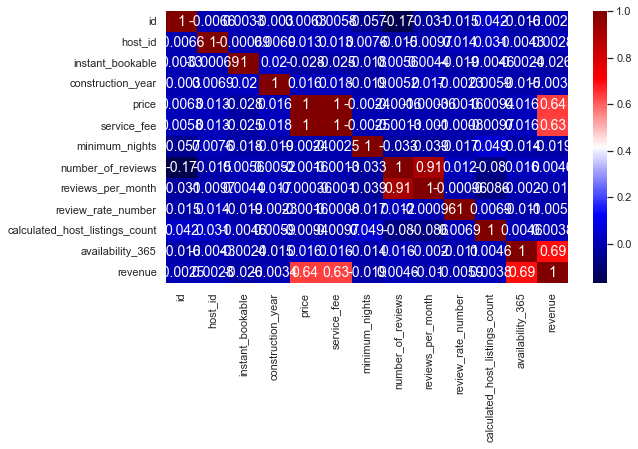

In [45]:
sns.heatmap(data.corr(), annot  = True, cmap = "seismic")

In [46]:
## studying the offer of accommodations according to the different room types:

room_types = data.room_type.value_counts(normalize=True).mul(100).round(1)
room_types

Entire home/apt    60.8
Private room       37.9
Shared room         1.3
Name: room_type, dtype: float64

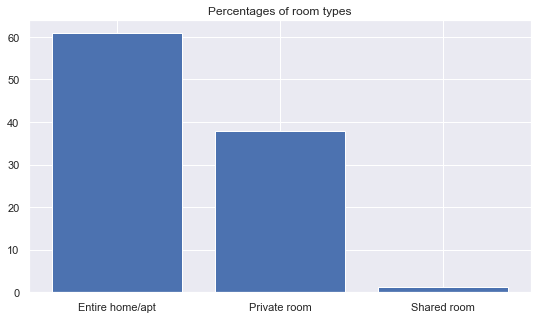

In [47]:
plt.title("Percentages of room types")
plt.bar(room_types.index, room_types);

In [48]:
The majority of the accommodations belong to the category "Entire home/apt", closely followed by "Private room". There is a very low offer of "Shared room".

SyntaxError: invalid syntax (1420302335.py, line 1)

In [ ]:
# comparing with the prices

plt.title("Distribution of prices")
plt.hist(data.price);

In [ ]:
There seems to be some uniformity in the distribution of the prices, which are in the range 50-1200 dollars.

In [49]:
# the most common and uncommon cancellation policie

cancellations = data.cancellation_policy.value_counts()
cancellations

flexible    1676
moderate    1665
strict      1635
Name: cancellation_policy, dtype: int64

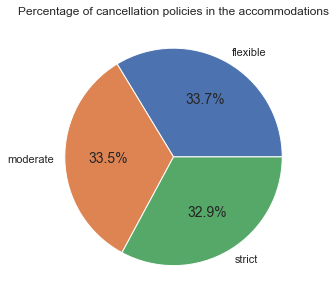

In [50]:
plt.title("Percentage of cancellation policies in the accommodations")
plt.pie(cancellations, autopct='%1.1f%%', labels = cancellations.index);

In [51]:
The cancellation policies are almost evenly distributed between the 3 categories.

SyntaxError: invalid syntax (1424601539.py, line 1)

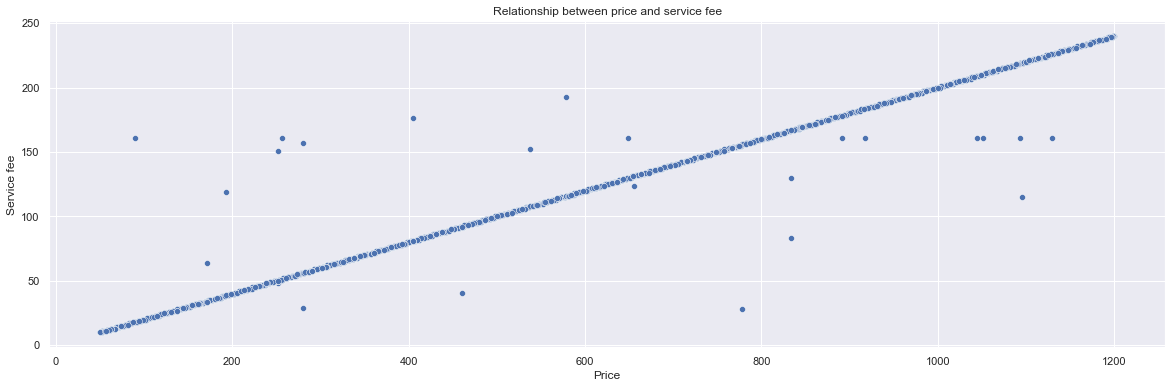

In [52]:
# Examining if there is a correlation between the price and the service fee.

plt.figure(figsize=(20, 6))
plt.title("Relationship between price and service fee")
plt.xlabel("Price")
plt.ylabel("Service fee")
sns.scatterplot(x=data.price, y=data.service_fee);

In [53]:
# calculating the correlation between price and service fee
data["price"].corr(data["service_fee"]) 

0.9970768442075116

In [54]:
There is a large correlation between price and service fee. It seems the service fee represents a fixed percentage of the price.

SyntaxError: invalid syntax (636439904.py, line 1)

In [55]:
round(((data.service_fee / data.price) * 100).mean(),2)

20.06

In [56]:
The service fee seems to represent 20% of the price.

SyntaxError: invalid syntax (705119843.py, line 1)

In [57]:
#The number of accommodations, according to their year of construction.

acc_by_const_year = data.groupby("construction_year").minimum_nights.count().to_frame().rename(columns={"minimum_nights":"number_of_accommodations"})
acc_by_const_year


number_of_accommodations
construction_year                          
2003.0                                  256
2004.0                                  252
2005.0                                  234
2006.0                                  268
2007.0                                  263
2008.0                                  264
2009.0                                  275
2010.0                                  254
2011.0                                  264
2012.0                                  224
2013.0                                  246
2014.0                                  253
2015.0                                  227
2016.0                                  233
2017.0                                  231
2018.0                                  231
2019.0                                  264
2020.0                                  226
2021.0                                  266
2022.0                                  245

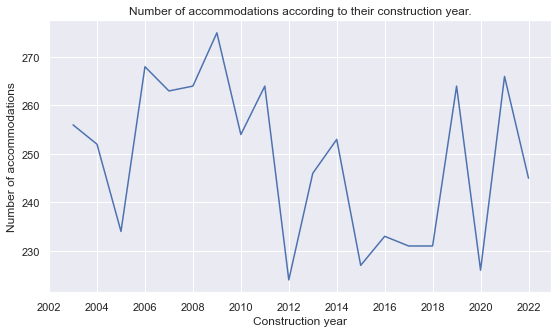

In [58]:
plt.plot(acc_by_const_year)
plt.xticks(np.arange(2002, 2023, step=2))
plt.xlabel("Construction year")
plt.ylabel("Number of accommodations")
plt.title("Number of accommodations according to their construction year.");

In [59]:
The highest number of accommodations available were built in 2009, whereas the lowest number belongs to those built in 2012.

SyntaxError: invalid syntax (2683805020.py, line 1)

In [60]:
# Histograms

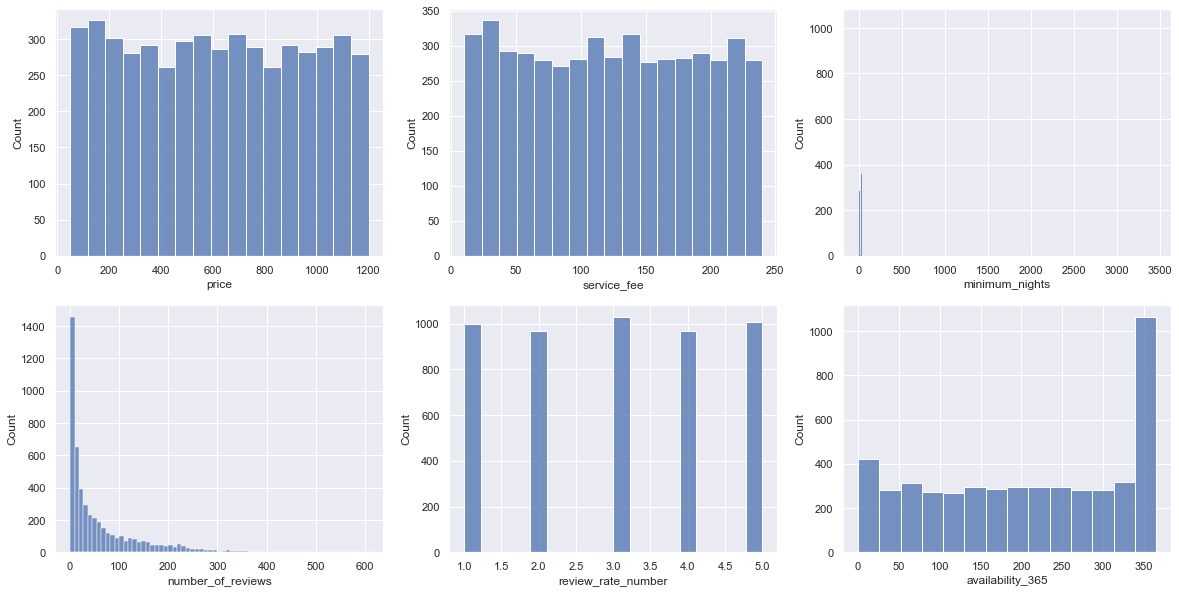

In [61]:
columns = ['price', 'service_fee', 'minimum_nights','number_of_reviews','review_rate_number', 'availability_365']
fig,ax = plt.subplots(2,3, figsize = (20,10));
ax =ax.flatten()
for i in range(len(columns)):
        sns.histplot(data[columns[i]],ax = ax[i]);

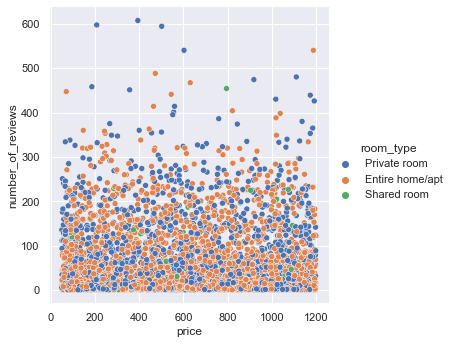

In [62]:
#scatter plots

sns.relplot(data=data, kind='scatter', x='price', y='number_of_reviews', hue='room_type');

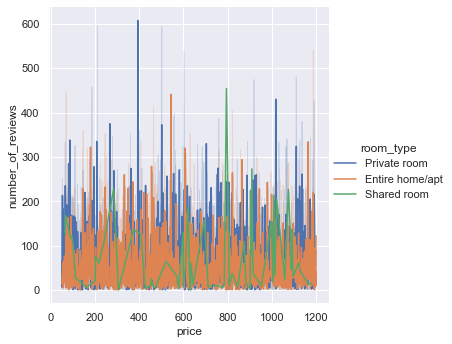

In [63]:
#line plot
sns.relplot(data=data, kind='line', x='price', y='number_of_reviews', hue='room_type');

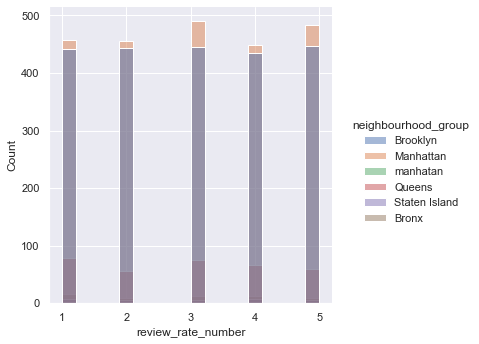

In [64]:
#Distribution Plots
sns.displot(kind="hist",data=data, x='review_rate_number', hue='neighbourhood_group');

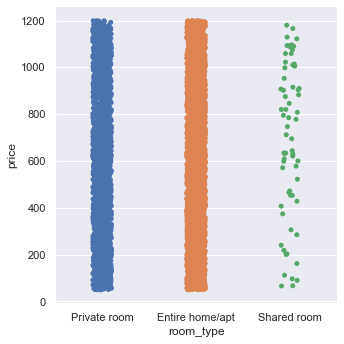

In [65]:
#Categorical Plots
sns.catplot(kind="strip",data=data, x='room_type', y='price');


In [66]:
# descripton of dataset with more visualization 

data.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})


/var/folders/vg/y6j496v145591np0gdrmp27m0000gn/T/ipykernel_92221/4267362160.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})


<AxesSubplot:>

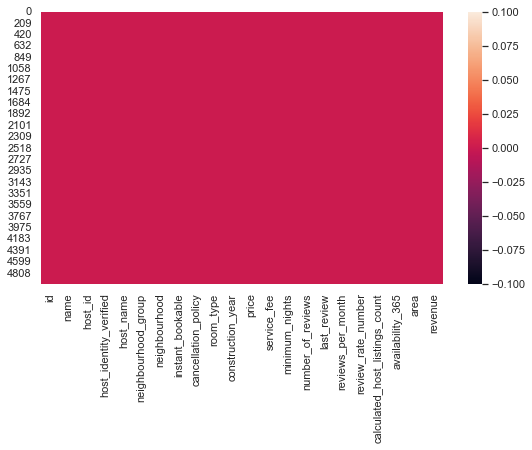

In [67]:
sns.heatmap(data.isnull())

In [68]:
# Number of verified and non-verified of the identity of the host 

data['host_identity_verified'].value_counts()


unconfirmed    2501
verified       2475
Name: host_identity_verified, dtype: int64

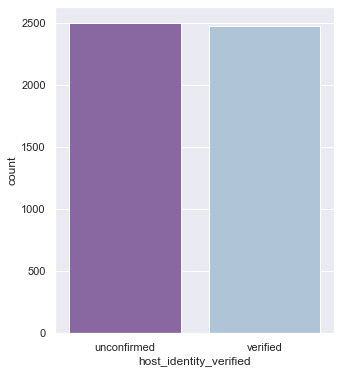

In [69]:
feature = 'host_identity_verified'

plt.figure(figsize=(5,6))
plt.xlabel("feature: {}".format(feature))
sns.countplot(data=data, x='host_identity_verified', palette='BuPu_r')
plt.show()

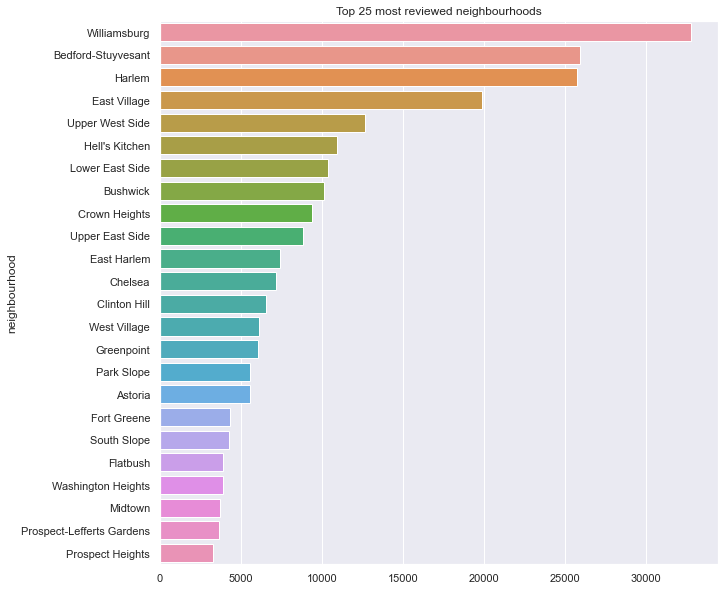

In [70]:
# Top 25 most reviewed neighbourhoods

top_25_reviewed_neighbourhoods = data.groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False)[0:24]

plt.figure(figsize=(10,10))
plt.title("Top 25 most reviewed neighbourhoods")
sns.barplot(x=top_25_reviewed_neighbourhoods.values,y=top_25_reviewed_neighbourhoods.index)
plt.show()

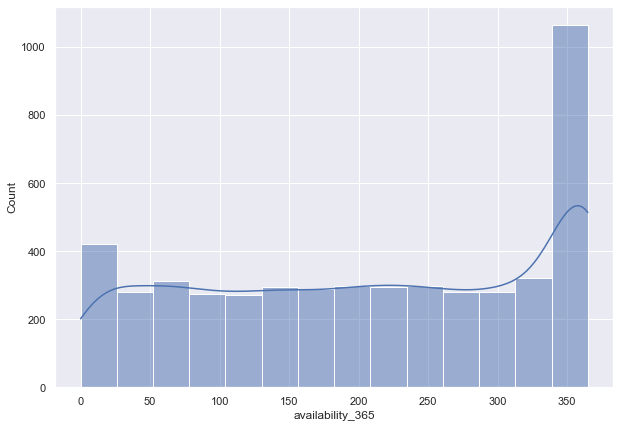

In [71]:
# number of days the owners of the house receive the guest in their house throughout the year 

plt.figure(figsize=(10,7))
sns.histplot(data=data, x='availability_365', kde=True)
plt.show()


In [72]:
 # making groups every 3 months 
     
data['availability_group'] = np.where(data['availability_365']<=90, '0-3 Months',
                   np.where((data['availability_365'] > 9) & (data['availability_365'] <= 180), '3-6 Months',
                   np.where((data['availability_365'] > 180) & (data['availability_365'] <= 270), '6-9 Months', '9-12 Months')))
data['availability_group'].value_counts()

9-12 Months    1831
0-3 Months     1141
6-9 Months     1032
3-6 Months      972
Name: availability_group, dtype: int64

<AxesSubplot:ylabel='availability_group'>

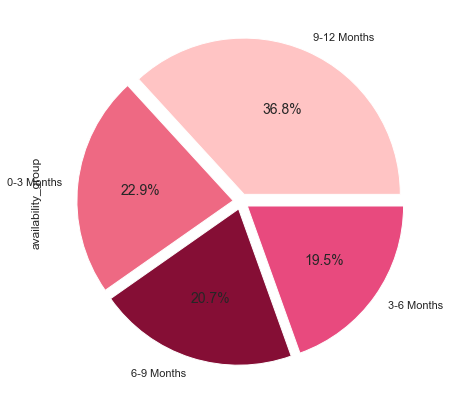

In [73]:
# most available set of dates of the year

round(data['availability_group'].value_counts()/ data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%',figsize =(7, 10),explode=(0.05,0.05,0.05,0.05),
                                                                               colors=['#FFC4C4','#EE6983','#850E35','#e84a7e'])

In [74]:
from 9-12 months is the most available dates

SyntaxError: invalid syntax (3640927533.py, line 1)

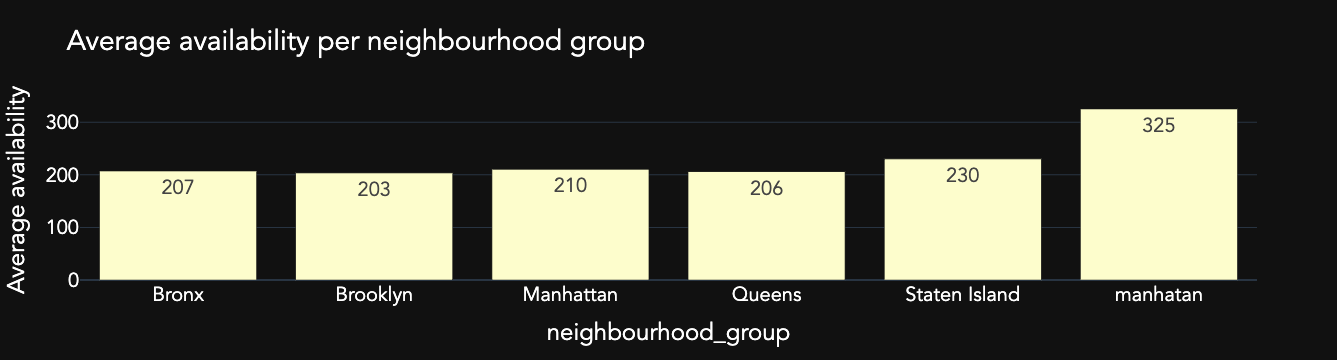

In [75]:
# average availability for each neighbourhood group?

availability_per_neighbourhood_group = data.groupby('neighbourhood_group')['availability_365'].mean()
fig = px.bar(availability_per_neighbourhood_group,
            x=availability_per_neighbourhood_group.index,
            y=availability_per_neighbourhood_group.values,
            labels={'x': 'Neighbourhood group', 'y': 'Average availability'},
            text=[str(round(i)) for i in availability_per_neighbourhood_group.values],
            title='Average availability per neighbourhood group',
            color_discrete_sequence=px.colors.sequential.deep,
            template='plotly_dark'
)

fig.update_layout(font=dict(size=20, color='white', family='Avenir'))

fig.show()

In [ ]:
Brooklyn is the most popular listing, followed by Queens. It seems that manhatan is the least popular listings. 

In [ ]:
# the relationship with neighbourhood group and the price

fig, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=2)
sns.boxplot(x="neighbourhood_group", y="price", data=data, palette="flare")



In [ ]:
# average price for each room type

price_per_room_type = data.groupby('room_type')['price'].median()
fig = px.bar(price_per_room_type,
            x=price_per_room_type.index,
            y=price_per_room_type.values,
            labels={'x': 'Room type', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_room_type.values],
            title='Average price per room type in USD',
            color_discrete_sequence=px.colors.sequential.Bluyl,
            template='plotly_dark'
)

fig.update_layout(font=dict(size=16, color='white', family='Avenir'))

fig.show()

In [ ]:
The average price per night is $600 for all type

In [ ]:
# Is the later construction year correlated with higher price?

price_per_year = data.groupby('construction_year')['price'].median()
fig = px.line(price_per_year,
            x=price_per_year.index,
            y=price_per_year.values,
            labels={'x': 'Construction year', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_year.values],
            title='Average price per construction year in USD',
            color_discrete_sequence=px.colors.sequential.Teal_r,
            template='plotly_dark'
)

fig.update_layout(font=dict(size=16, color='white', family='Avenir'))

fig.show()

In [ ]:
the average price managed to stay between 600and 650 per night, but there are some outliers that are way above that price.

In [ ]:
# What is the most Construction year ?

plt.figure(figsize=(10,10))
plt.xlabel("feature: {}".format(feature))
sns.barplot(y=data['construction_year'].value_counts().index, 
            x=data['construction_year'].value_counts(), palette="gist_earth_r", orient='h')
plt.show()

In [ ]:
#How many constructions are there for each year

constructions_per_year = data.groupby('construction_year')['construction_year'].count()

# Let's plot them using plotly's barplot with value counts
fig = px.bar(constructions_per_year, 
            x=constructions_per_year.index, 
            y=constructions_per_year.values, 
            labels={'x': 'Construction year', 'y': 'Number of constructions'},
            text=[str(i) for i in constructions_per_year.values],
            title='Number of constructions per year',
            template='plotly_dark'
)

fig.update_layout(font=dict(size=20, color='white', family='Avenir'))

fig.show()

In [ ]:
# What are the price ranges for each construction year

fig = px.bar(price_per_year,
            x=price_per_year.index,
            y=price_per_year.values,
            labels={'x': 'Construction year', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_year.values],
            title='Average price per construction year in USD',
            color_discrete_sequence=px.colors.sequential.RdBu,
            template='plotly_dark'
)

fig.update_layout(font=dict(size=16, color='white', family='Avenir'))

fig.show()

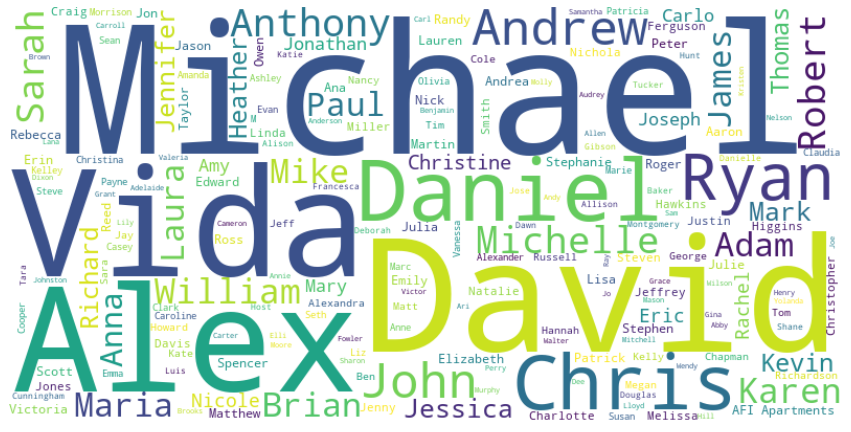

In [81]:
#Host name
from wordcloud import WordCloud

host_names = data['host_name'].values
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(host_names))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [104]:
# Encoding host_identity_verified

data['host_identity_verified'].value_counts()


unconfirmed    2501
verified       2475
Name: host_identity_verified, dtype: int64

In [105]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
data['host_identity_verified'] = host_identity_verified_le.fit_transform(data['host_identity_verified'])

In [106]:
data['host_identity_verified'].value_counts()
# unconfirmed --> 0 , verified --> 1


0    2501
1    2475
Name: host_identity_verified, dtype: int64

In [107]:
# Encoding instant_bookable

data['instant_bookable'].value_counts()


False    2492
True     2484
Name: instant_bookable, dtype: int64

In [108]:
le = LabelEncoder()
instant_bookable_le = LabelEncoder()
data['instant_bookable'] = instant_bookable_le.fit_transform(data['instant_bookable'])
data['instant_bookable'].value_counts()
# False --> 0 , True --> 1 

0    2492
1    2484
Name: instant_bookable, dtype: int64

In [109]:
######################################################################################################################################################

In [110]:
######################### Part 3: Analysis and Report #########################

In [111]:
######################################################################################################################################################

In [112]:
## Encoding cancellation_policy

data['cancellation_policy'].value_counts()

0    1676
1    1665
2    1635
Name: cancellation_policy, dtype: int64

In [113]:
le = LabelEncoder()
cancellation_policy_le = LabelEncoder()
data['cancellation_policy'] = cancellation_policy_le.fit_transform(data['cancellation_policy'])
data['cancellation_policy'].value_counts()
# moderate --> 1 , strict --> 2 , flexible --> 0

0    1676
1    1665
2    1635
Name: cancellation_policy, dtype: int64

In [114]:
# Encoding Room Type

data['room_type'].value_counts()


0    3024
1    1885
2      67
Name: room_type, dtype: int64

In [115]:
le = LabelEncoder()
room_type_le = LabelEncoder()
data['room_type'] = room_type_le.fit_transform(data['room_type'])
data['room_type'].value_counts()
# Private room --> 1 , Entire home/apt --> 0 , Shared room --> 2

0    3024
1    1885
2      67
Name: room_type, dtype: int64

In [116]:
# Encoding neighbourhood_group

data['neighbourhood_group'].value_counts()


2    2335
1    2211
3     336
0      62
4      31
5       1
Name: neighbourhood_group, dtype: int64

In [117]:
le = LabelEncoder()
neighbourhood_group_le = LabelEncoder()
data['neighbourhood_group'] = neighbourhood_group_le.fit_transform(data['neighbourhood_group'])
data['neighbourhood_group'].value_counts()
# Brooklyn --> 1 , Manhattan --> 2 , Bronx --> 0 , Queens --> 3 , Staten Island --> 4 

2    2335
1    2211
3     336
0      62
4      31
5       1
Name: neighbourhood_group, dtype: int64

In [118]:
data.select_dtypes('object')

name host_name  \
0                    Clean & quiet apt home by the park  Madaline   
1                                 Skylit Midtown Castle     Jenna   
2                   THE VILLAGE OF HARLEM....NEW YORK !     Elise   
3      Entire Apt: Spacious Studio/Loft by central park    Lyndon   
4             Large Cozy 1 BR Apartment In Midtown East  Michelle   
...                                                 ...       ...   
4995      1 Bedroom  Apartment close to Northwell & JFK    Louann   
4996                             Spacious 2BR townhouse    Andrew   
4997  Cozy UES apartment with balcony near Central Park     Grace   
4998                     Upper East Renovated 1 Bedroom       Dan   
4999                 Spacious Bedroom 15 mins from NYC!   Beatriz   

        neighbourhood      area availability_group  
0          Kensington   brookln        9-12 Months  
1             Midtown  manhatan         6-9 Months  
2              Harlem  manhatan        9-12 Months  
3         East Harlem  manhatan        9-12 Months  
4         Murray Hill  manhatan        9-12 Months  
...               ...       ...                ...  
4995   Queens Village    Queens         6-9 Months  
4996         Bushwick   brookln        9-12 Months  
4997  Upper East Side  manhatan        9-12 Months  
4998      East Harlem  manhatan        9-12 Months  
4999        Sunnyside    Queens        9-12 Months  

[4976 rows x 5 columns]

In [119]:
## Data Spliting

split_data = data.copy()

In [120]:
split_data.head()

id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
4  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   

   host_identity_verified host_name  neighbourhood_group neighbourhood  \
0                       0  Madaline                    1    Kensington   
1                       1     Jenna                    2       Midtown   
2                       1     Elise                    2        Harlem   
3                       1    Lyndon                    2   East Harlem   
4                       1  Michelle                    2   Murray Hill   

   instant_bookable  cancellation_policy  room_type  ...  minimum_nights  \
0                 0                    2          1  ...              10   
1                 0                    1          0  ...              30   
2                 1                    0          1  ...               3   
3                 0                    1          0  ...              10   
4                 1                    0          0  ...               3   

   number_of_reviews  last_review  reviews_per_month  review_rate_number  \
0                9.0   2021-10-19               0.21                 4.0   
1               45.0   2022-05-21               0.38                 4.0   
2                9.0   2022-05-21               0.38                 5.0   
3                9.0   2018-11-19               0.10                 3.0   
4               74.0   2019-06-22               0.59                 3.0   

  calculated_host_listings_count  availability_365      area   revenue  \
0                              6               286   brookln  276276.0   
1                              2               228  manhatan   32376.0   
2                              1               352  manhatan  218240.0   
3                              1               289  manhatan   58956.0   
4                              1               365  manhatan  210605.0   

   availability_group  
0         9-12 Months  
1          6-9 Months  
2         9-12 Months  
3         9-12 Months  
4         9-12 Months  

[5 rows x 23 columns]

In [121]:
split_data.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'price',
       'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'area', 'revenue',
       'availability_group'],
      dtype='object')

In [122]:
split_data = split_data[['host_identity_verified','neighbourhood_group','instant_bookable','cancellation_policy','room_type',
                         'construction_year','minimum_nights','number_of_reviews', 'reviews_per_month',
                         'review_rate_number', 'calculated_host_listings_count',
                         'availability_365','price', 'service_fee']]

In [123]:
x =split_data.drop(["price"],axis=1).values
y= split_data['price'].values

In [142]:
## split into train test sets

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)
# 25 % --> test
# 75 % --> train 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3732, 13) (1244, 13) (3732,) (1244,)


In [125]:

ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

In [ ]:
##  Modeling

In [171]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
    plt.figure(figsize=(15,8))
    plt.plot(df[:20])
    plt.legend(['Actual' , 'Predicted'])

In [ ]:
## Select and Train one algorithm of your choice to predict the target variable

##  Linear Regression ##


In [127]:
## We need to create an instance of the Linear Regression Python object. We will assign this to a variable called reg. 
## Using fit method to train this model on our training data.

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
regv =reg.score(x_train,y_train)
regv


0.9947039207717396

In [ ]:
## The model has now been trained. You can examine each of the model’s coefficients using the following statements:

In [128]:
reg.score(x_test,y_test)


0.9883018541596807

In [129]:
reg.intercept_


620.3257936870544

In [130]:
reg.coef_


array([-9.01584035e-01,  7.53492135e-02, -1.73357910e+00,  2.10498115e+00,
       -7.41911228e-01, -3.08979391e-01, -2.48577102e-03, -5.47271162e-01,
        5.10869117e-01, -6.10224719e-01,  2.63216505e-02, -1.27085613e-01,
        5.89172651e+02])

In [131]:
## A nicer way to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:

pd.DataFrame(reg.coef_ , split_data.columns[:-1] , columns=['Coeficient'])


Coeficient
host_identity_verified           -0.901584
neighbourhood_group               0.075349
instant_bookable                 -1.733579
cancellation_policy               2.104981
room_type                        -0.741911
construction_year                -0.308979
minimum_nights                   -0.002486
number_of_reviews                -0.547271
reviews_per_month                 0.510869
review_rate_number               -0.610225
calculated_host_listings_count    0.026322
availability_365                 -0.127086
price                           589.172651

In [ ]:
In the Above Table, large coefficients on a specific variable mean that that variable has a large impact on the value of the variable you’re trying to predict. 
Similarly, small values have small impact.

In [132]:
## Making Predictions From Our Model
## predict variable is designed to make predictions, it only accepts an x-array parameter. It will generate the y values for you!

y_pred = reg.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df.head(10)

Y_test       Y_pred
0   289.0   271.451908
1   244.0   220.204251
2   638.0   643.067552
3   636.0   638.444539
4   995.0  1016.742178
5   512.0   503.524685
6  1114.0  1147.313057
7   750.0   756.258253
8   234.0   208.760199
9   140.0   108.272157

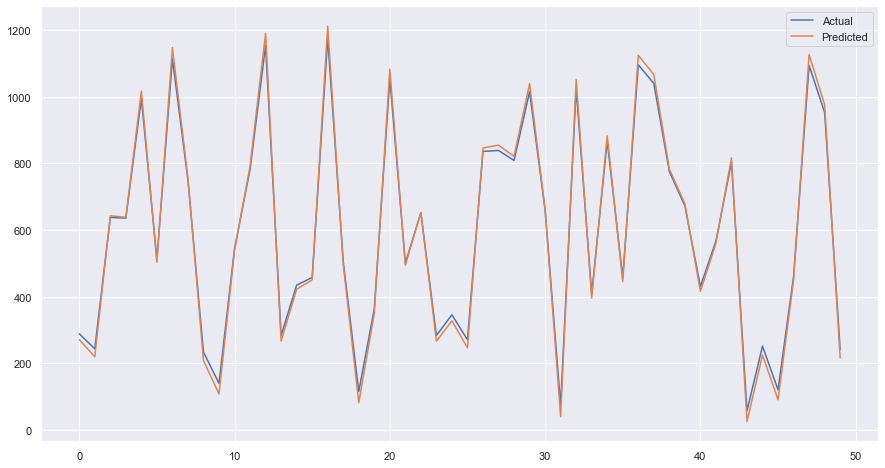

In [133]:
plt.figure(figsize=(15,8))
plt.plot(df[:50])
plt.legend(['Actual' , 'Predicted'])

In [ ]:
Above, our predicted values are very close to the actual values for the observations in the data set. 

In [134]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.9883018541596807

In [ ]:
## Testing the Performance of our Model

In [135]:
p = len(x_train[0])
n = len(y_train)
adj_R2l = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R2l

0.9882609515518475

In [136]:
adj_R2l < reg_score

True

In [137]:
mse = mean_squared_error(y_test , y_pred)
mse

1280.414805112132

In [138]:
mae = mean_absolute_error(y_test , y_pred)
mae

19.37811461615403

In [139]:
mpae= mean_absolute_percentage_error(y_test,y_pred)
mpae

0.06616819253041235

In [140]:
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse= np.sqrt(reg_mse)
reg_rmse

35.78288424808895

In [187]:
## Accuracy score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.178


In [194]:
#print(classification_report(y_test, y_pred,digits=4))

In [ ]:
##[50 Extra-credit] Identify, train, and test a second algorithm that improves the predicting performance (it must improve the performance)##

In [ ]:
#### Decision Tree  #####

In [149]:
tdt = DecisionTreeRegressor().fit(x_train, y_train)
tdtv = tdt.score(x_train,y_train)
tdtv

1.0

In [150]:
tdt.score(x_test,y_test)


0.9825771926016894

In [151]:
y_pred = tdt.predict(x_test)


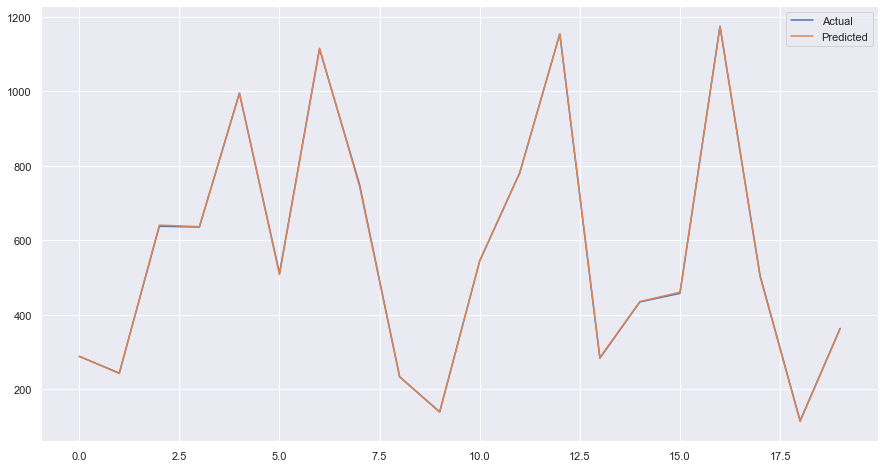

In [152]:
plot_predictions(tdt, x_test, y_test)


In [153]:
## Evaluation of Decision Tree

tdt_score = r2_score(y_test , y_pred)
tdt_score

0.9825771926016894

In [154]:
p = len(x_train[0])
n = len(y_train)
adj_R2t = 1-(1-tdt_score)*(n-1)/(n-p-1)
adj_R2t

0.9825162736947023

In [155]:
adj_R2t < tdt_score


True

In [156]:
mse = mean_squared_error(y_test , y_pred)
mse

1907.0048231511255

In [157]:
mae = mean_absolute_error(y_test,y_pred)
mae

5.916398713826367

In [158]:
mpae= mean_absolute_percentage_error(y_test,y_pred)
mpae

0.011251762914702684

In [159]:
reg_mse = mean_squared_error(y_test,y_pred)
reg_rmse= np.sqrt(reg_mse)
reg_rmse

43.66926634546458

In [160]:
## Comparing the 2 models

dic = {'linear Regression':regv,'Decision Tree':tdtv}

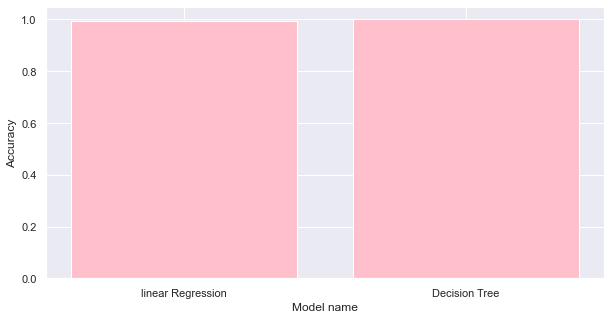

In [165]:
names = list(dic.keys())
values = list(dic.values())
plt.rc('font', size=20)

plt.figure(figsize=(10,5))
plt.xlabel('Model name')
plt.ylabel('Accuracy')

plt.bar(range(len(dic)), values, tick_label=names,color='pink')
plt.show()